In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output, display, Math


In [88]:
from keras.datasets import fashion_mnist


# Про dataset `fassion-mnist`

Fashion-MNIST — це набір зображень статей Zalando, що складається з навчального набору з 60 000 прикладів і тестового набору з 10 000 прикладів. Кожен приклад являє собою зображення в градаціях сірого 28x28, пов'язане з міткою з 10 класів:

| Мітка | Опис        | Переклад         |
|-------|-------------|------------------|
| 0     | T-shirt/top | Футболка/сорочка |
| 1     | Trouser     | Штани            |
| 2     | Pullover    | Светр            |
| 3     | Dress       | Плаття           |
| 4     | Coat        | Пальто           |
| 5     | Sandal      | Сандалі          |
| 6     | Shirt       | Сорочка          |
| 7     | Sneaker     | Кросовки         |
| 8     | Bag         | Сумка            |
| 9     | Ankle boot  | Чоботи           |

# Константи

In [89]:
num_classes = 10
num_features = 784  # кількість атрибутів вхідного вектора 28 * 28 = 784
batch_size = 256

class_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
                4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


# Підготовка навчального та тестового наборів

In [90]:
# Завантажуємо датасет і розділимо його на навчальну та тестову вибірки.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape(
    [-1, num_features]), x_test.reshape([-1, num_features])

# Нормалізуємо значення пікселів, щоб значення пікселів знаходилось у проміжку від 0 до 1, розділивши яскравість кожного пікселя на 255.
x_train, x_test = x_train / 255., x_test / 255.

# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)


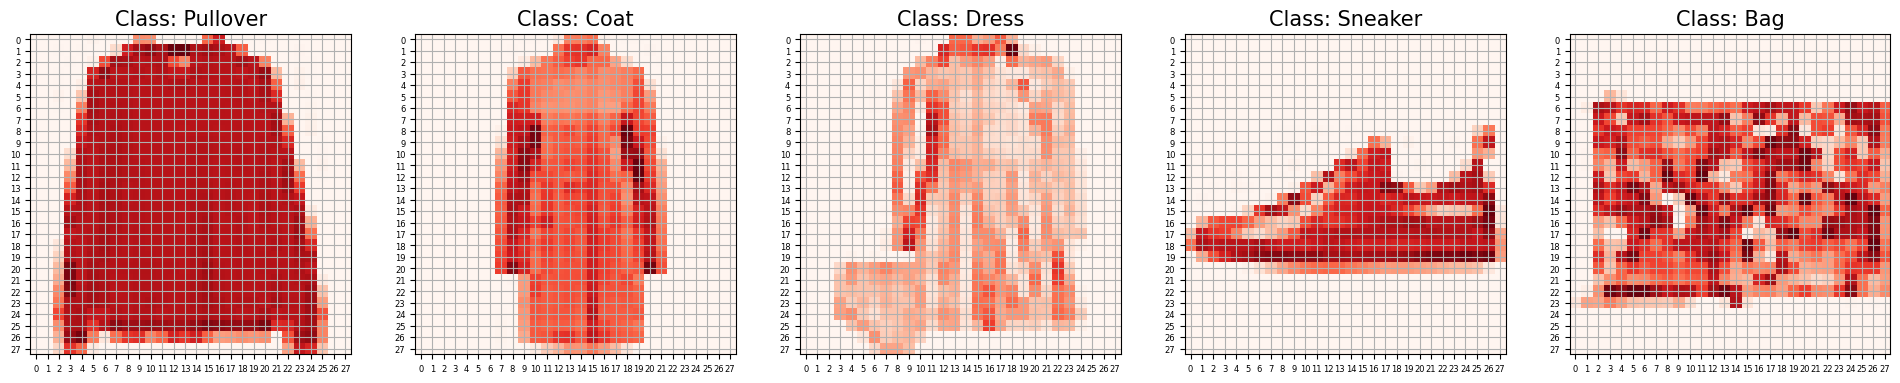

In [85]:
plt.figure(figsize=(24, 12))
number_of_images = 5
np.random.seed(0)
for i, sample_index in enumerate(np.random.randint(1, x_test.shape[0], number_of_images)):
    test_image = x_test[sample_index].reshape(1, -1)
    test_item = y_test[sample_index]
    plt.subplot(1, number_of_images, i + 1)
    plt.xticks(range(0, 28, 1), fontsize=6)
    plt.yticks(range(0, 28, 1), fontsize=6)
    plt.imshow(test_image[0].reshape((28, 28)), cmap='Reds')
    plt.title(f"Class: {class_labels.get(test_item)}", fontsize=15)
    plt.grid()

plt.show()


In [96]:
# Гіперпараметри
num_features = 784
num_classes = 10
batch_size = 64
epochs = 20  # Збільште кількість епох
learning_rate = 0.001
dropout_rate = 0.3


In [97]:
# Побудова архітектури моделі
model = keras.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(256, activation='relu'),  # Шар нейронів
    layers.Dropout(dropout_rate),
    layers.Dense(128, activation='relu'),  # Шар нейронів
    layers.Dropout(dropout_rate),
    layers.Dense(num_classes, activation='softmax')
])

# Вибір оптимізатора та швидкості навчання
# Змініть оптимізатор та швидкість навчання
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Компіляція моделі
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(train_data, epochs=epochs,
                    steps_per_epoch=len(x_train) // batch_size)

# Оцінка моделі на тестовому наборі даних
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')


Epoch 1/20
937/937 [==============================] - 10s 9ms/step - loss: 0.4730 - accuracy: 0.8309
Epoch 2/20
937/937 [==============================] - 8s 9ms/step - loss: 0.3390 - accuracy: 0.8765
Epoch 3/20
937/937 [==============================] - 9s 10ms/step - loss: 0.3028 - accuracy: 0.8886
Epoch 4/20
937/937 [==============================] - 11s 11ms/step - loss: 0.2795 - accuracy: 0.8966
Epoch 5/20
937/937 [==============================] - 10s 11ms/step - loss: 0.2611 - accuracy: 0.9025
Epoch 6/20
937/937 [==============================] - 11s 12ms/step - loss: 0.2486 - accuracy: 0.9071
Epoch 7/20
937/937 [==============================] - 12s 13ms/step - loss: 0.2345 - accuracy: 0.9113
Epoch 8/20
937/937 [==============================] - 12s 13ms/step - loss: 0.2242 - accuracy: 0.9159
Epoch 9/20
937/937 [==============================] - 10s 10ms/step - loss: 0.2168 - accuracy: 0.9183
Epoch 10/20
937/937 [==============================] - 10s 11ms/step - loss: 0.2075 - 